In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# FFT Auswertung U_Gen Rotorauslenkung

In [3]:
from pathlib import Path
folder='./Helper_scripts/'

importLibs=1
for path in Path(folder).rglob('*.py'):
    print(path.name)
    exec(open(path).read())

parseCC.py
GetFrequencyFromZCfile.py
VariablesExperiment.py
importLibs0.py
FFT.py
DisplayAndCut.py


In [4]:
#df.pivot(columns='Date', values='Value').head(1)
VariablesExperiment(20210729)

In [5]:
#characteristische Frequenzen
fc=[31,150,220]
nf(f=fc[0],ret='n_rpm')/60

f_el_31und 2p=12.0ergibt n=155.0 rpm


2.5833333333333335

In [6]:
scope_dat

Unnamed: 0  Index1      Date Description0   Part Description1  \
0          142     143  20210729     Aufnahme  scope           65   
1          143     144  20210729     Aufnahme  scope           66   
2          144     145  20210729     Aufnahme  scope           67   
3          145     146  20210729     Aufnahme  scope           68   
4          146     147  20210729     Aufnahme  scope           69   
5          147     148  20210729     Aufnahme  scope           70   
6          148     149  20210729     Aufnahme  scope           71   
7          149     150  20210729     Aufnahme  scope           72   
8          150     151  20210729     Aufnahme  scope           73   
9          151     152  20210729     Aufnahme  scope           74   
10         152     153  20210729     Aufnahme  scope           75   
11         153     154  20210729     Aufnahme  scope           76   
12         154     155  20210729     Aufnahme  scope           77   

                                           SerialFile  \
0                                                 NaN   
1   ../measurement_data/20210729/ZC/Lines_20210729...   
2   ../measurement_data/20210729/ZC/Lines_20210729...   
3   ../measurement_data/20210729/ZC/Lines_20210729...   
4   ../measurement_data/20210729/ZC/Lines_20210729...   
5   ../measurement_data/20210729/ZC/Lines_20210729...   
6   ../measurement_data/20210729/ZC/Lines_20210729...   
7   ../measurement_data/20210729/ZC/Lines_20210729...   
8   ../measurement_data/20210729/ZC/Lines_20210729...   
9   ../measurement_data/20210729/ZC/Lines_20210729...   
10  ../measurement_data/20210729/ZC/Lines_20210729...   
11  ../measurement_data/20210729/ZC/Lines_20210729...   
12  ../measurement_data/20210729/ZC/Lines_20210729...   

                                            ScopeFile           Symbol  \
0   ../measurement_data/20210729/scope/scope_65_1.csv         parallel   
1   ../measurement_data/20210729/scope/scope_66_1.csv         parallel   
2   ../measurement_data/20210729/scope/scope_67_1.csv         parallel   
3   ../measurement_data/20210729/scope/scope_68_1.csv         parallel   
4   ../measurement_data/20210729/scope/scope_69_1.csv         parallel   
5   ../measurement_data/20210729/scope/scope_70_1.csv         parallel   
6   ../measurement_data/20210729/scope/scope_71_1.csv  Stator_Inclined   
7   ../measurement_data/20210729/scope/scope_72_1.csv  Stator_Inclined   
8   ../measurement_data/20210729/scope/scope_73_1.csv  Stator_Inclined   
9   ../measurement_data/20210729/scope/scope_74_1.csv  Stator_Inclined   
10  ../measurement_data/20210729/scope/scope_75_1.csv  Stator_Inclined   
11  ../measurement_data/20210729/scope/scope_76_1.csv  Stator_Inclined   
12  ../measurement_data/20210729/scope/scope_77_1.csv  Stator_Inclined   

   CalcByPy 2Tex  Value Unit          Unnamed: 13  
0       NaN  NaN    NaN  NaN                  NaN  
1       NaN  NaN   31.2   Hz                  NaN  
2       NaN  NaN   31.3   Hz                  NaN  
3       NaN  NaN   31.2   Hz                  NaN  
4       NaN  NaN   31.3   Hz                  NaN  
5       NaN  NaN   31.2   Hz                  NaN  
6       NaN  NaN   31.2   Hz                  NaN  
7       NaN  NaN    NaN   Hz                  NaN  
8       NaN  NaN   31.2   Hz                  NaN  
9       NaN  NaN   31.2   Hz  abnehmnede Drehzahl  
10      NaN  NaN   31.2   Hz                  NaN  
11      NaN  NaN   31.0   Hz              n const  
12      NaN  NaN   31.3   Hz              n const

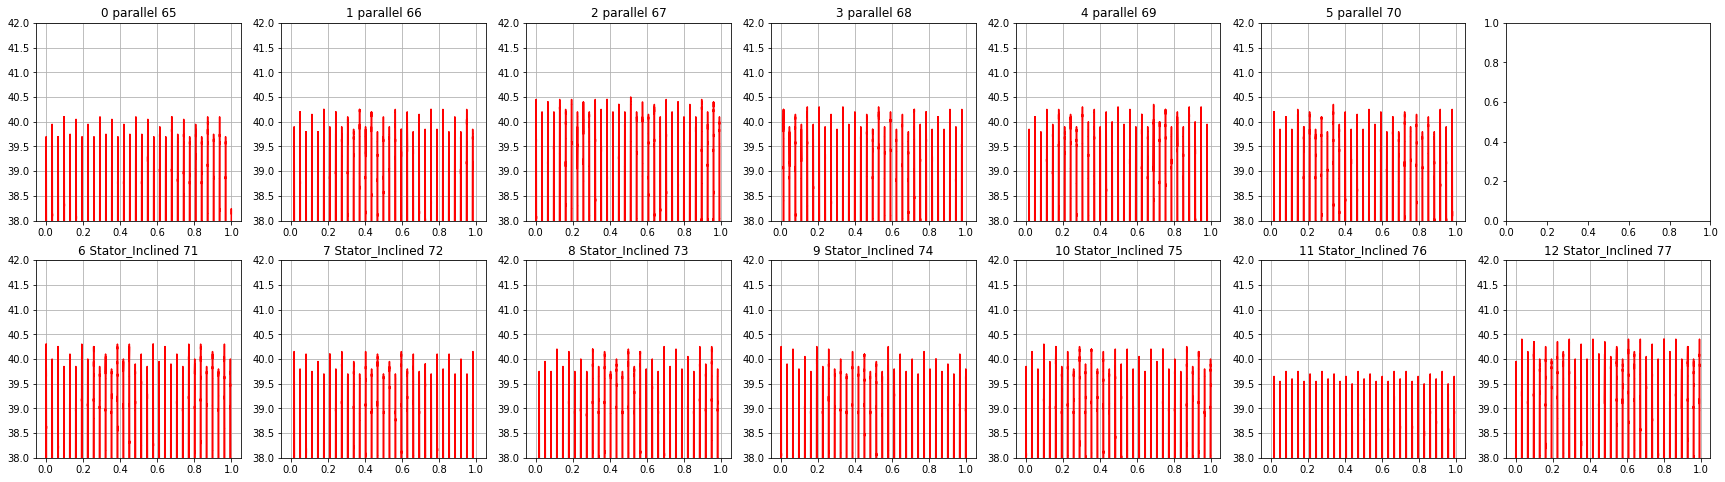

In [7]:
fig, ax = plt.subplots(2,7,figsize = (30,8))
for index, row in scope_dat.loc[:].iterrows():
    if(row['Symbol']=='parallel'):
        ax1=ax[0,index]
    else:
        ax1=ax[1,index-6]
    ax0=ax1
    scope1=pd.read_csv(row['ScopeFile'],sep=",",skiprows=[0],names=['time','sig1'],header=0)
    ax0.plot(scope1['time'],scope1['sig1'],c='red')
    ax0.set_ylim(38,42)
    ax0.set_title(str(index)+ ' '+row['Symbol']+' '+ row['Description1'])
    ax0.grid(True)
    #print(row['ScopeFile'])

## FFT für Fenster f0

In [8]:
bin_width=10
#ti_col=name='ti_f'+str(fc[0])+'_1sek'
ti_col='ti_f'+str(fc[0])+'_nearest_1sek'
print(ti_col)
for index, row in scope_dat.iterrows():
    xf,yf, delta_f, totalN=FFT_ASCIIscope_mov2(row['ScopeFile'],zeroNrel=4,ti=0,tf=1) #Zero Padding to achieve delta_f=0.2
    if(index==0):
        spek=pd.DataFrame(xf,columns=['freq'])
    spek[index]=yf
    #make bins & store
    bins=xf//bin_width
    df_b0=pd.DataFrame(bins,columns=['bins'])
    df_b0['yf']=pd.DataFrame(yf)
    if(index==0):
        df_b1=df_b0.groupby(['bins']).sum()
        df_b1.rename(columns = {"yf": index}, inplace=True)
    else:
        df_b1[index]=df_b0.groupby(['bins']).sum()
df_b1['bins']=df_b1.index
df_b1['freq']=df_b1['bins']*bin_width
spek_bins=df_b1.copy()

ti_f31_nearest_1sek
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)
499999 2499995 0.200000640002048 (1249997,) (1249997,)


In [9]:
spek

freq         0         1         2         3         4  \
0             0.000000  0.293252  0.317694  0.316746  0.321781  0.328573   
1             0.200001  0.287450  0.311375  0.310438  0.315425  0.322008   
2             0.400001  0.270646  0.293071  0.292172  0.297014  0.302993   
3             0.600002  0.244548  0.264645  0.263818  0.268422  0.273466   
4             0.800003  0.211719  0.228892  0.228181  0.232455  0.236333   
...                ...       ...       ...       ...       ...       ...   
1249992  249999.199997  0.000024  0.000013  0.000012  0.000037  0.000013   
1249993  249999.399998  0.000024  0.000014  0.000012  0.000036  0.000015   
1249994  249999.599999  0.000024  0.000014  0.000011  0.000034  0.000016   
1249995  249999.799999  0.000023  0.000015  0.000010  0.000032  0.000017   
1249996  250000.000000  0.000023  0.000015  0.000009  0.000030  0.000018   

                5         6         7         8         9        10        11  \
0        0.342156  0.329953  0.332293  0.328501  0.319949  0.315882  0.319771   
1        0.335328  0.323376  0.325661  0.321988  0.313593  0.309586  0.313418   
2        0.315550  0.304330  0.306456  0.303123  0.295188  0.291352  0.295019   
3        0.284833  0.274768  0.276635  0.273826  0.266619  0.263047  0.266453   
4        0.246197  0.237614  0.239140  0.236981  0.230710  0.227466  0.230539   
...           ...       ...       ...       ...       ...       ...       ...   
1249992  0.000023  0.000008  0.000013  0.000005  0.000020  0.000010  0.000010   
1249993  0.000021  0.000007  0.000015  0.000005  0.000023  0.000008  0.000010   
1249994  0.000018  0.000006  0.000016  0.000005  0.000026  0.000006  0.000010   
1249995  0.000014  0.000005  0.000017  0.000004  0.000028  0.000004  0.000010   
1249996  0.000010  0.000004  0.000018  0.000004  0.000030  0.000003  0.000009   

               12  
0        0.326680  
1        0.320208  
2        0.301463  
3        0.272362  
4        0.235776  
...           ...  
1249992  0.000024  
1249993  0.000020  
1249994  0.000016  
1249995  0.000012  
1249996  0.000008  

[1249997 rows x 14 columns]

## Visualisierung der Ergebnisse

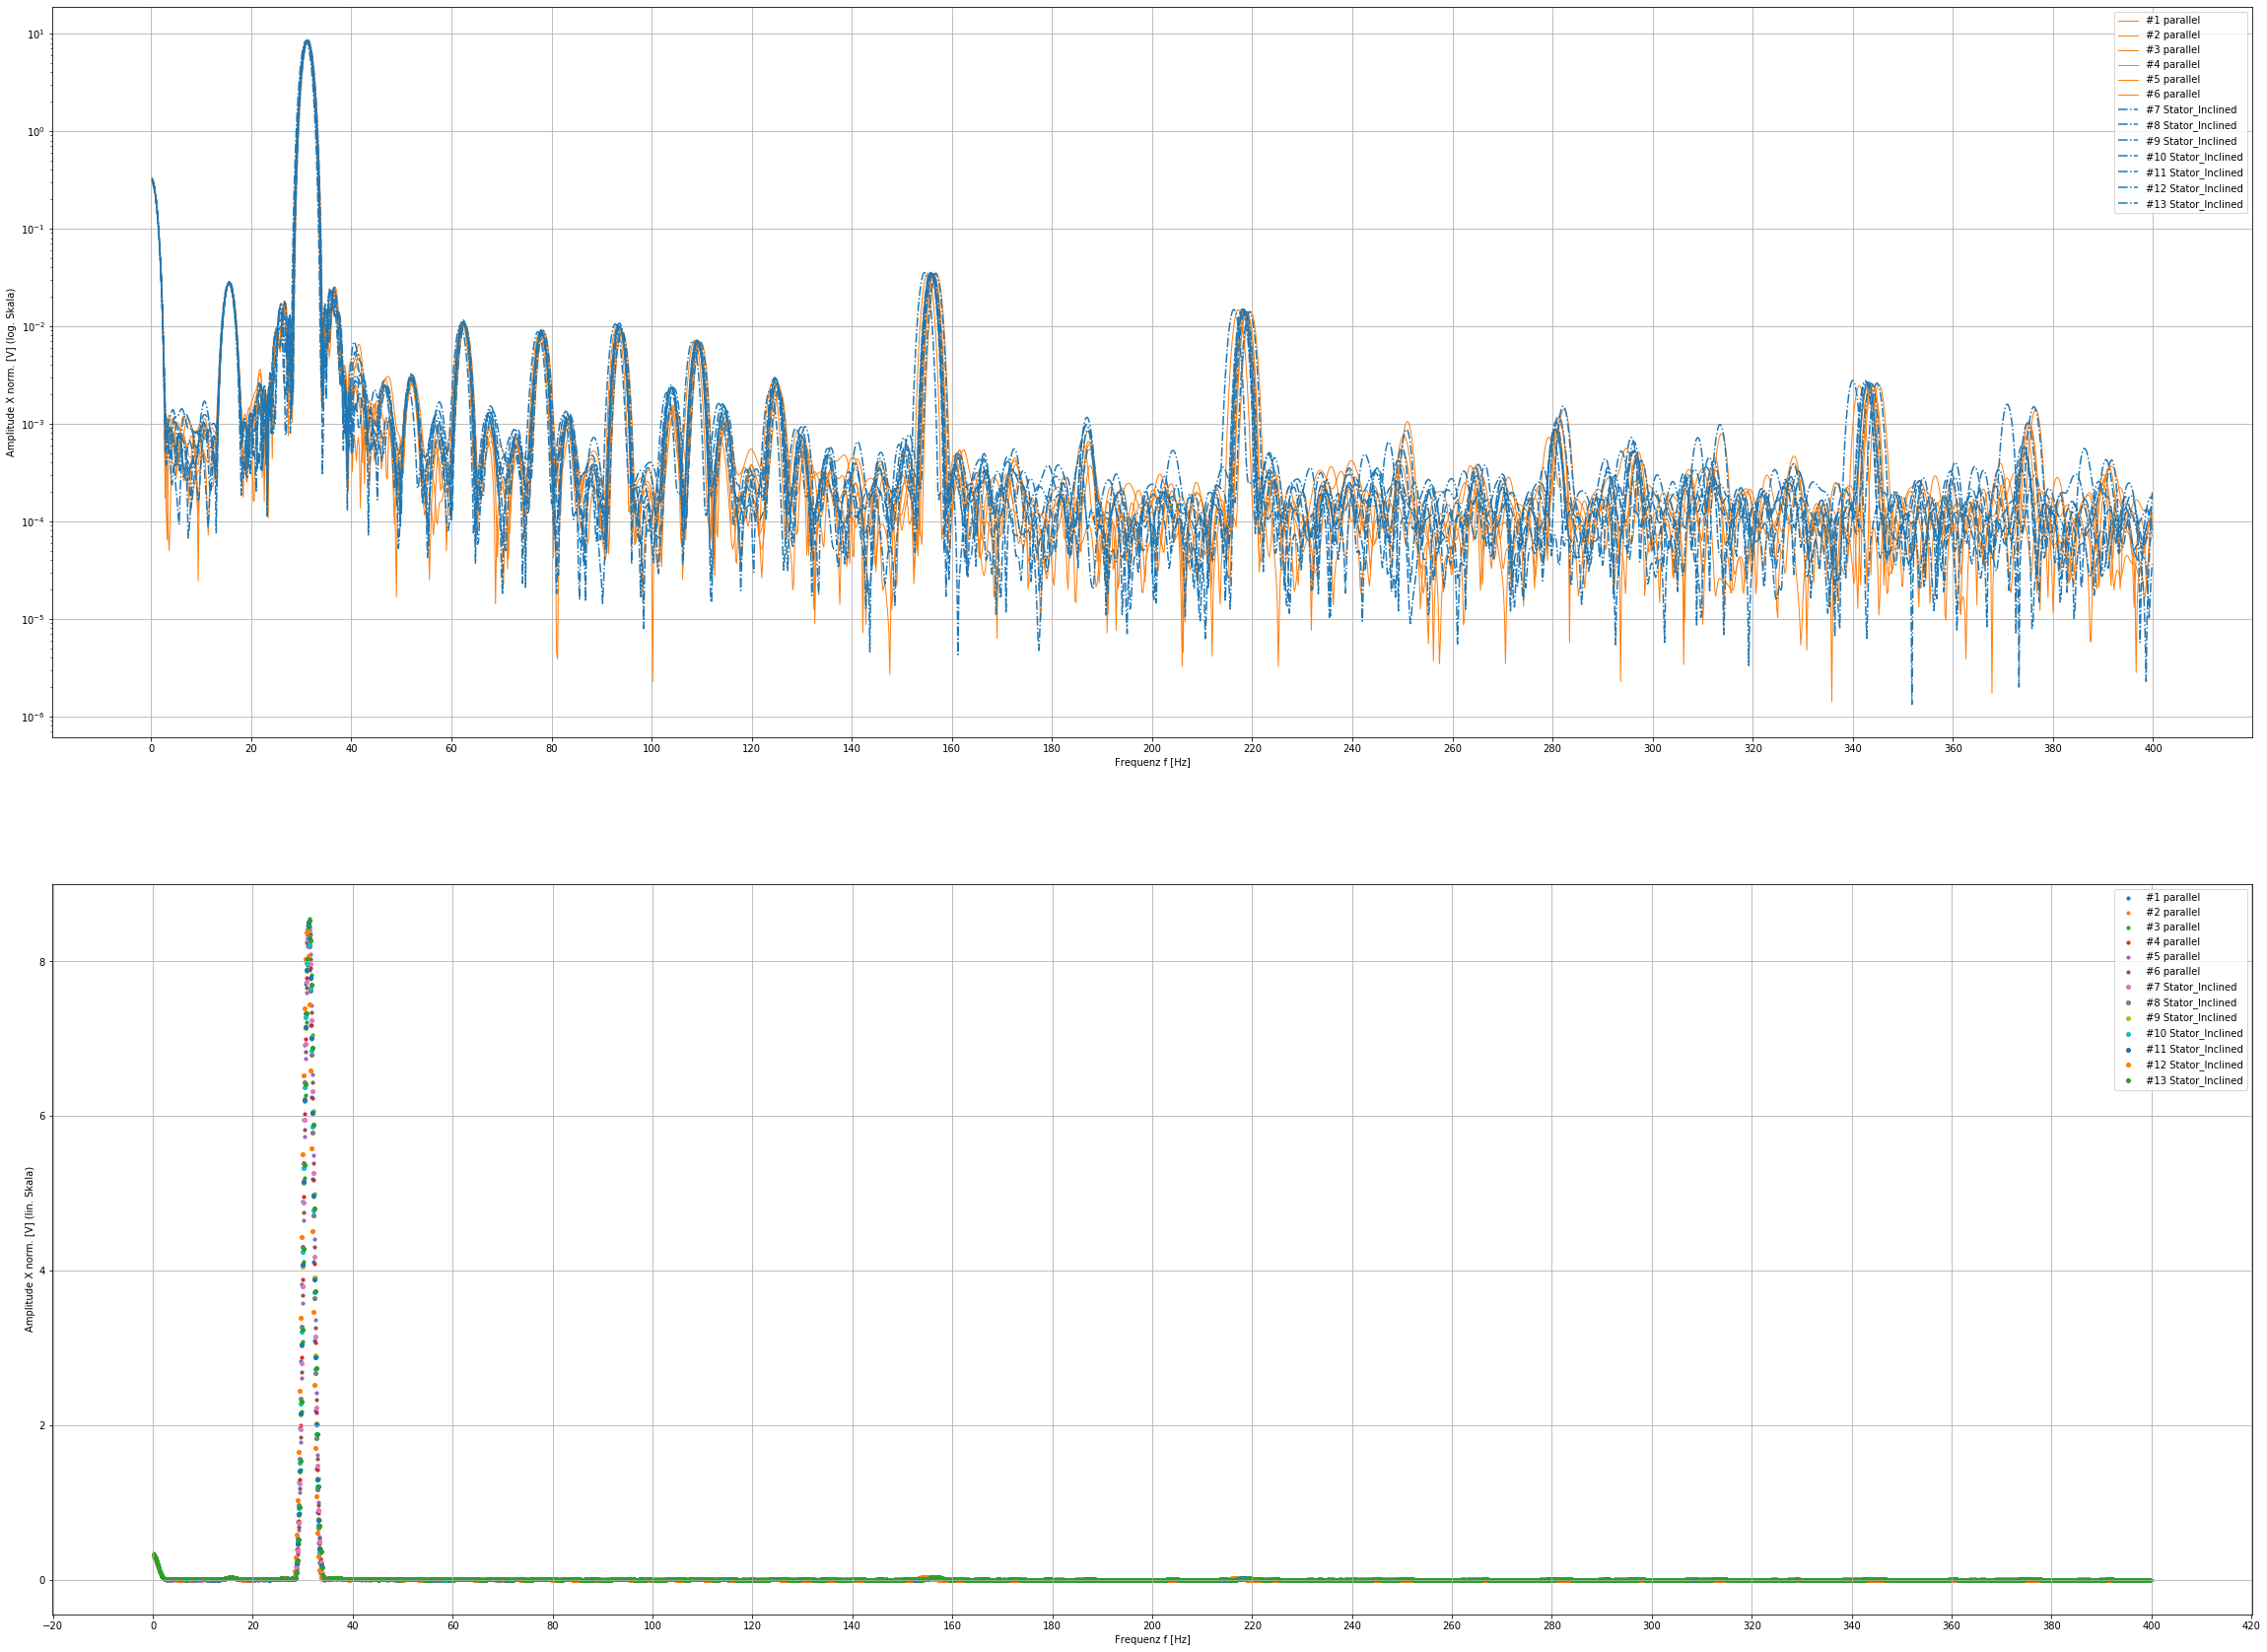

In [10]:
plotfft2(spek,m=0,n=400,dtick=20,plot=0,figsize=(2*20,2*15))

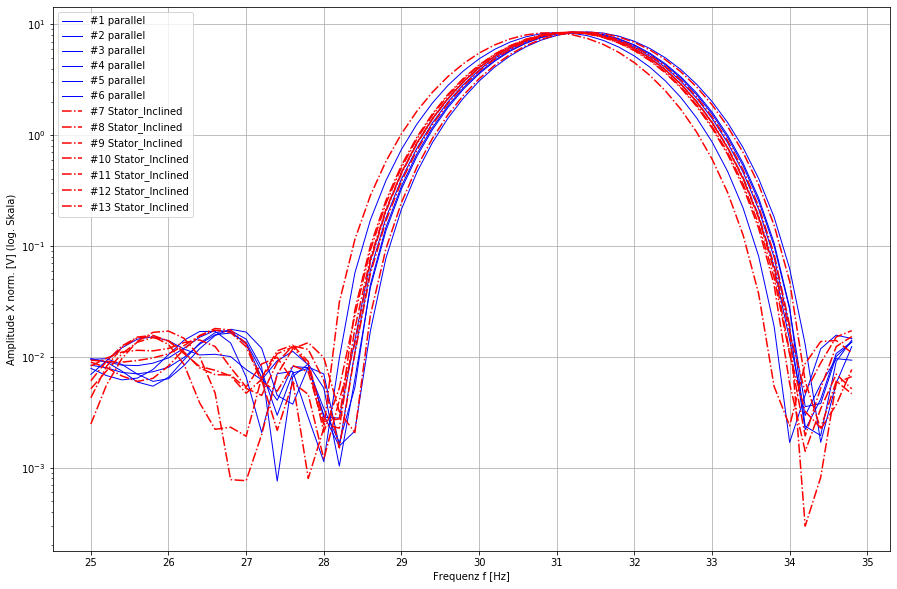

In [11]:
plotfft2(spek,m=25,n=35,dtick=1,plot=1,figsize=(15,10),kontrast=5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


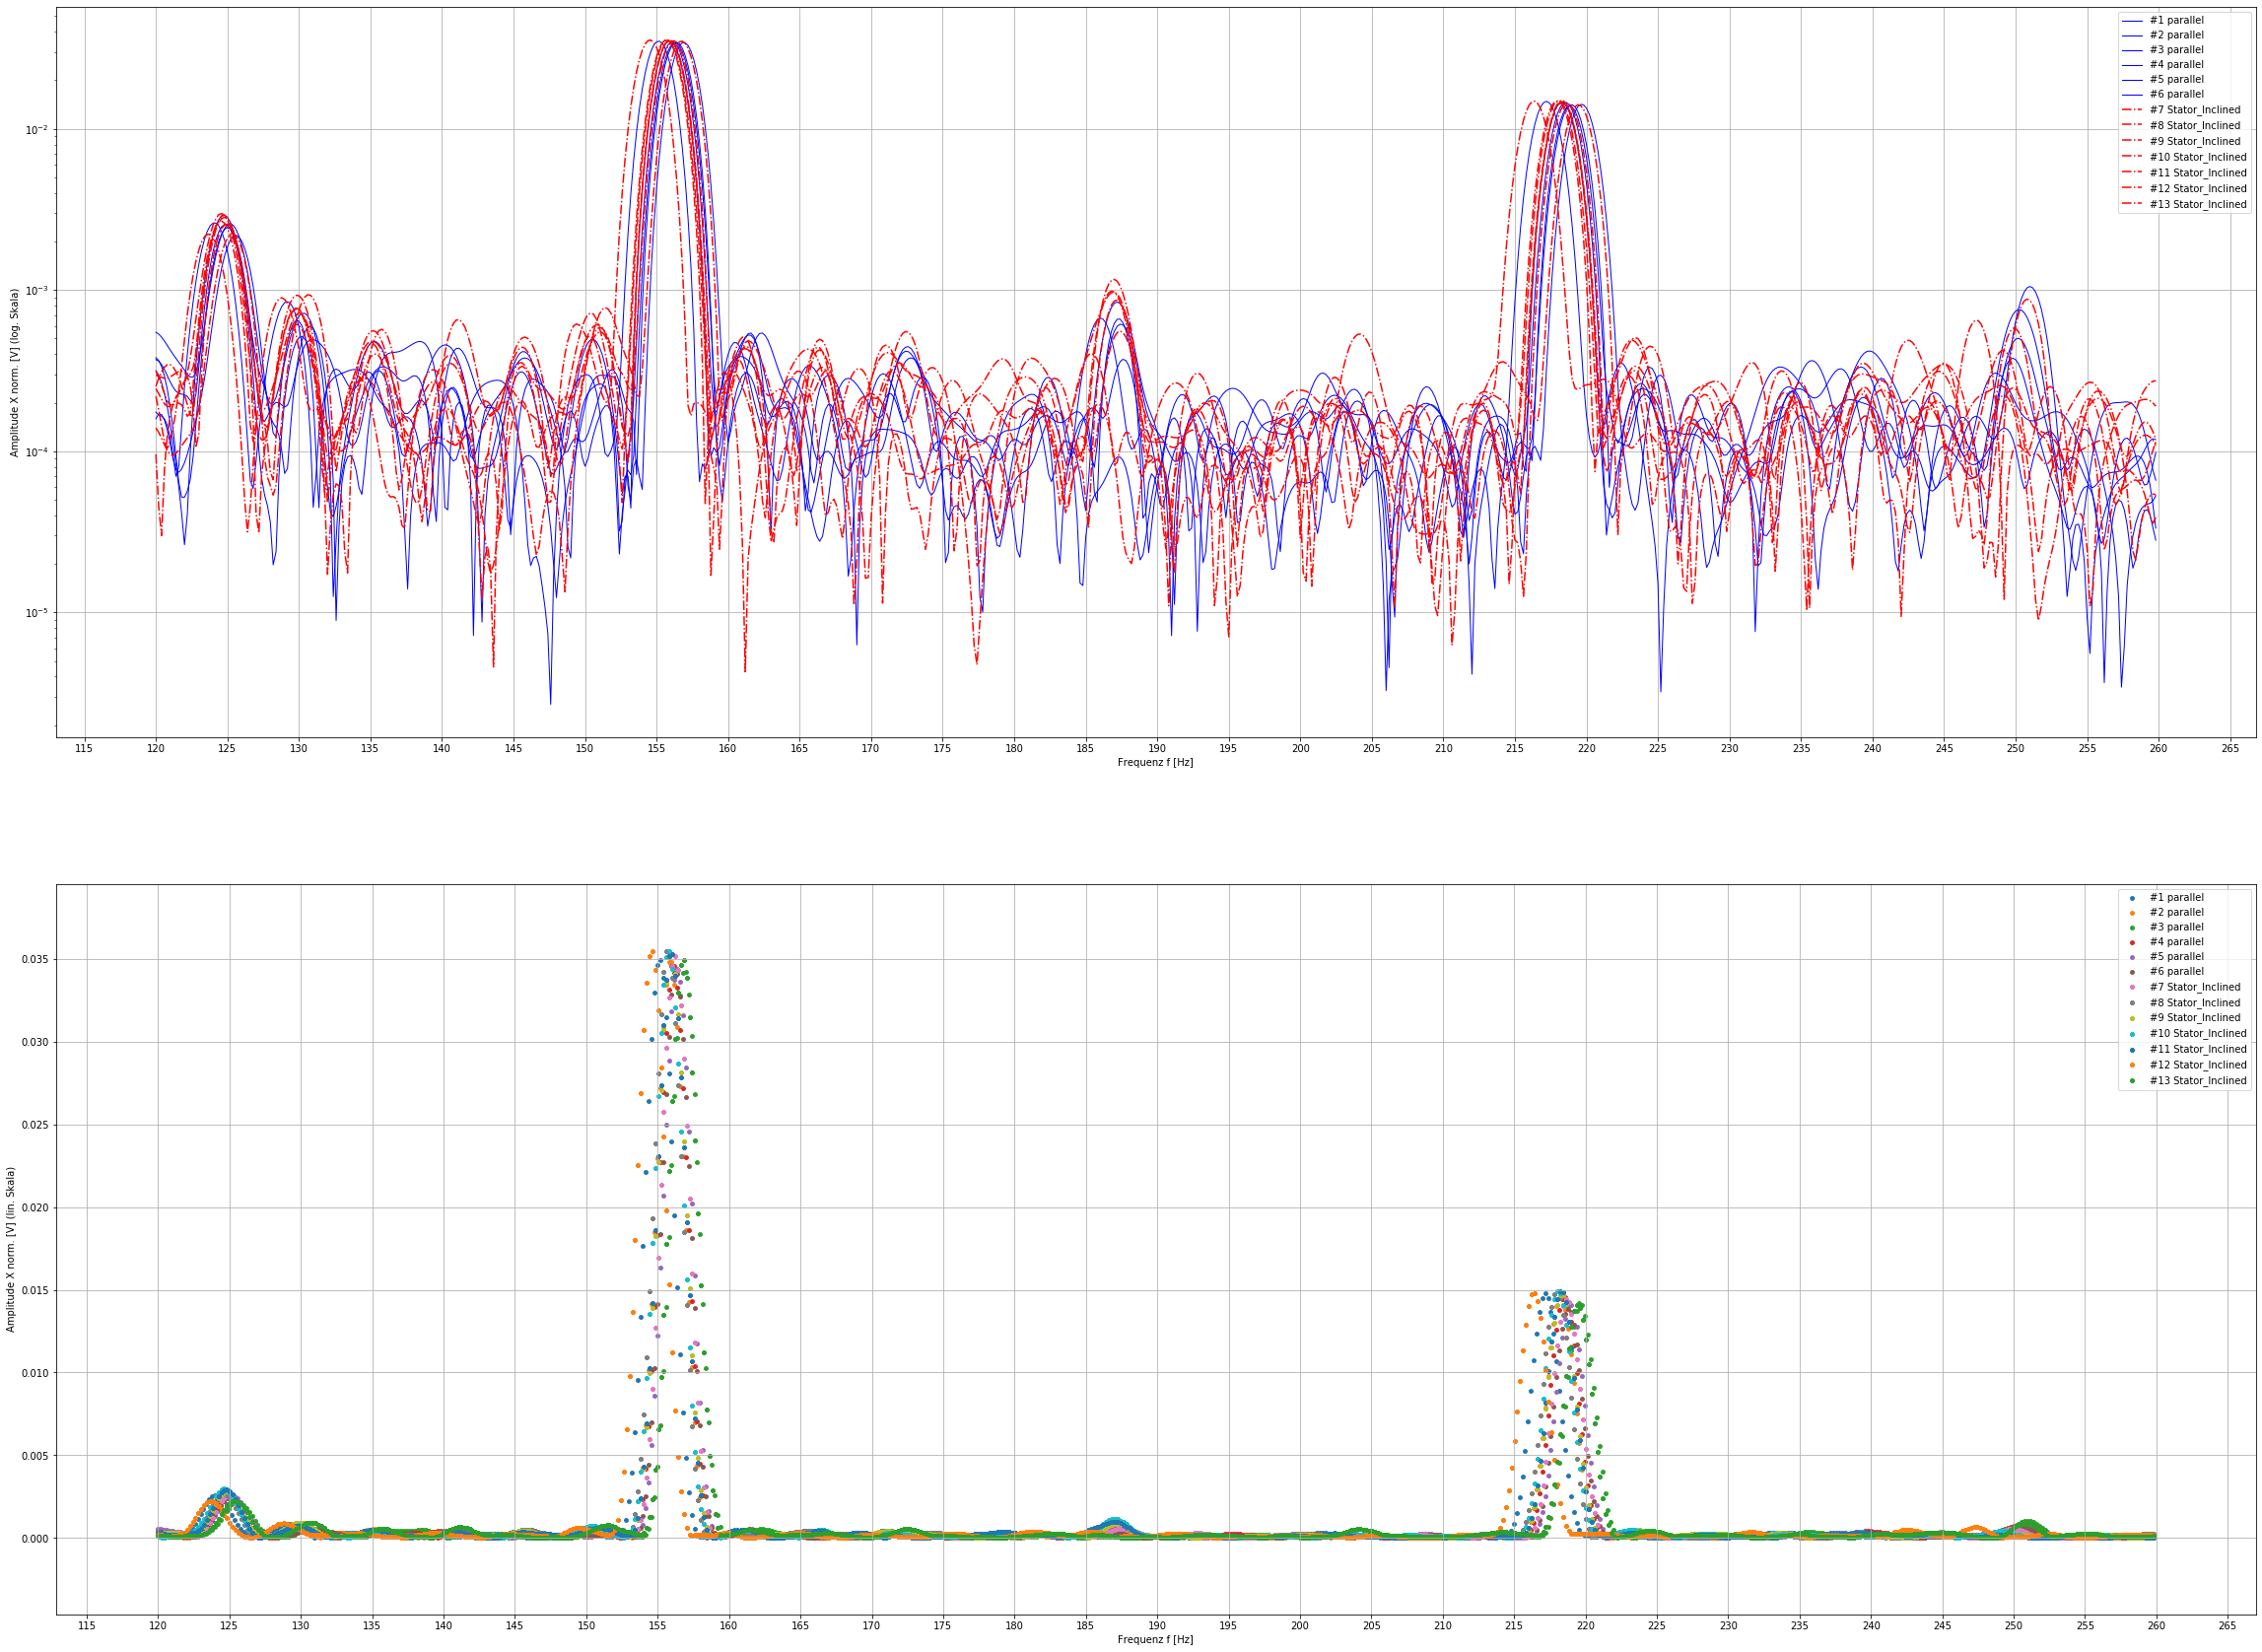

In [12]:
plotfft2(spek,m=120,n=260,sp=15,dtick=5,kontrast=5,file="Ausschnitt1",figsize=(2*20,2*15))

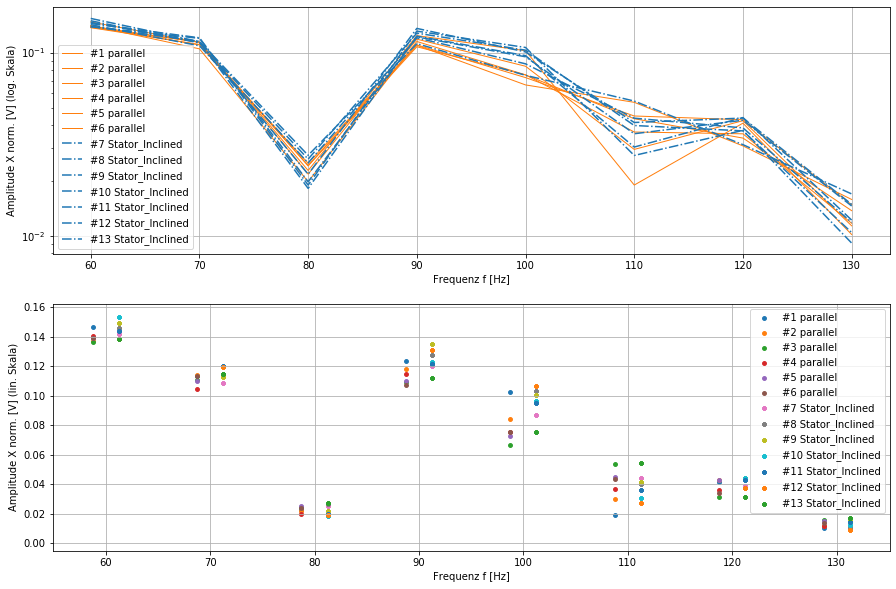

In [13]:
plotfft2(df_b1,m=50,n=140,sp=15,dtick=10)

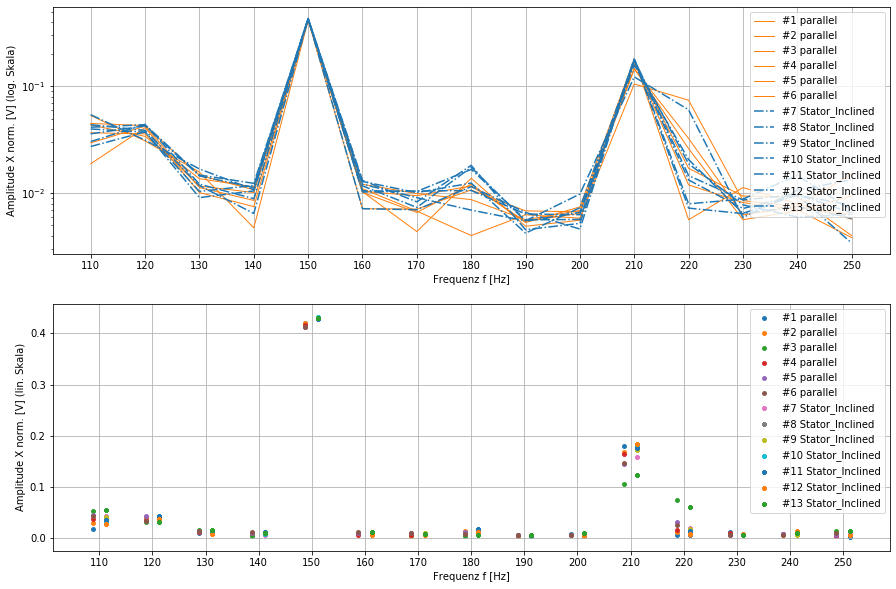

In [14]:
plotfft2(df_b1,m=100,n=260,sp=15,dtick=10)

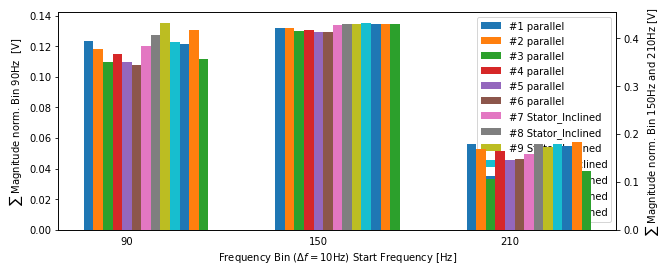

In [15]:
# Bar Chart for MA
fc_plot=[90,150,210]
fig, ax0 = plt.subplots(figsize = (10,4))
ax1=ax0.twinx()
df1=df_b1
width =0.05
x=np.arange(len(fc_plot))
for index, row in scope_dat.iterrows():
    for i in range(len(fc_plot)):
        data=df1.loc[df1['freq']==fc_plot[i],index].values[0]
        if(i==0): ax=ax0;c='Pastel1';#;print('go')
        else:     ax=ax1;c='green'
        #print(i,ax)
        t1='#'+str(index+1)+' '+row['Symbol']
        ax.bar(i+(index-4)*width, data, width=width,color='C'+str(index),label=t1)
#ax0.set_ylim(12.6,13)
#ax1.grid(True)
#ax1.set_ylim(0,0.04)
for ax in [ax0,ax1]:
    ax0.set_xticks(x)
    ax0.set_xticklabels(fc_plot, rotation=0)
    ax0.xaxis.set_ticks_position('none') 
ax0.legend()
ax0.set_xlabel(r"Frequency Bin ($\Delta f=$"+str(round(bin_width))+"Hz) Start Frequency [Hz]")
ax0.set_ylabel(r"$\sum$ Magnitude norm. Bin "+str(fc_plot[0])+"Hz  [V]")
ax1.set_ylabel(r"$\sum$ Magnitude norm. Bin "+str(fc_plot[1])+"Hz and "+str(fc_plot[2])+"Hz [V]")
#plt.savefig("fc_Bins_plot.png",qual=600)
plt.show()

# 3. Spektrum mit normierter Frequenz (f_rmp = f1 ± k · fr)
* Durchschnittliche Drehzahl mit aus Spektrum (Oberwelle) ermitteln
* normierte Frequenzskala erstellen

In [16]:
# Drehzahl ermitteln
from bisect import bisect_left, bisect_right

k=7
scope_dat['fr_mean']=0
for index, row in scope_dat.iterrows():
    m=bisect_left(spek['freq'].values, 210)
    n=bisect_left(spek['freq'].values, 230)
    max1=spek.iloc[m:n][index].max()
    fc_max1=spek.loc[(spek[index]==max1),'freq'].values[0]
    fr=fc_max1/k
    #print(fr)
    scope_dat.loc[index,'fr_mean']=fr

(30, 32)

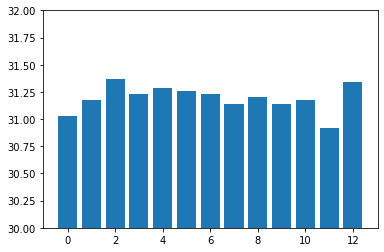

In [17]:
plt.bar(np.arange(0,scope_dat.loc[:,'fr_mean'].shape[0]),scope_dat.loc[:,'fr_mean'])
plt.ylim(30,32)

In [18]:
xk_spek=spek.copy()
for index, row in scope_dat.iterrows():
    fr=scope_dat.loc[index,'fr_mean']
    xk_spek[index]=xk_spek['freq']/fr    

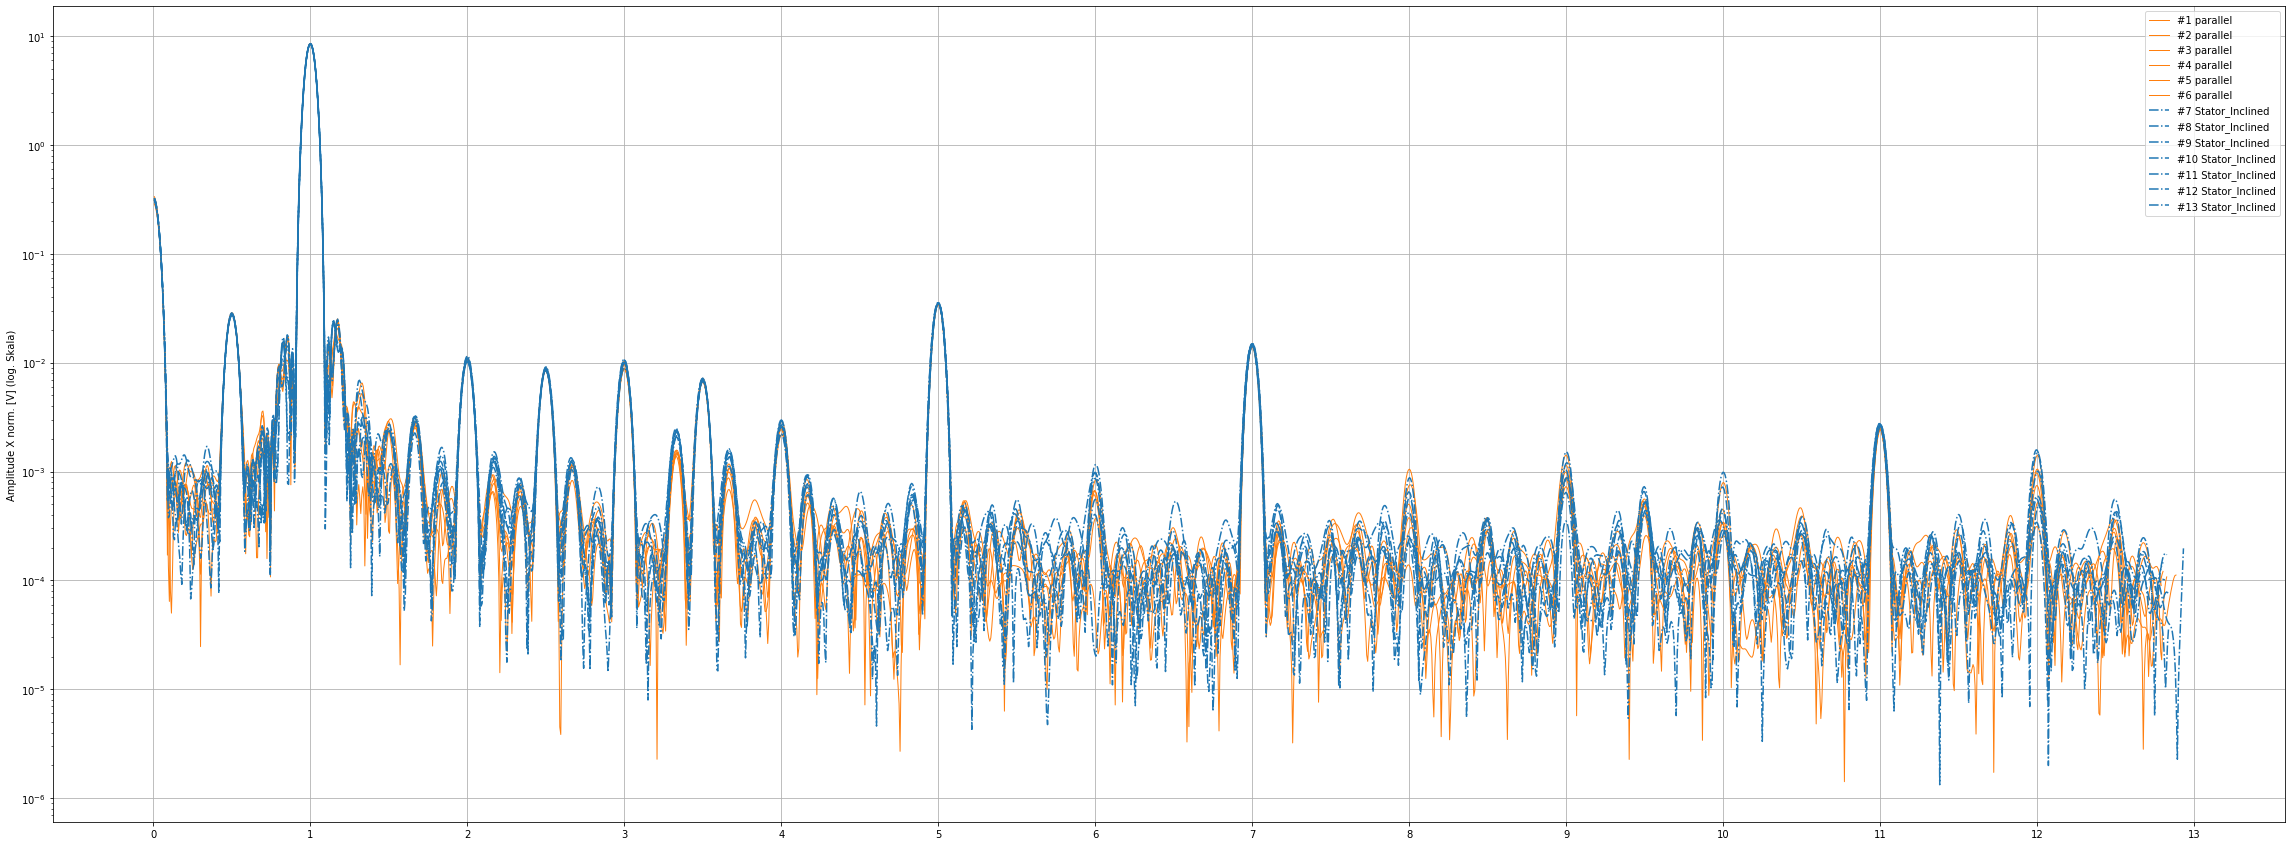

In [19]:
plotfft2(spek,xf=xk_spek,m=0,n=400,dtick=1,plot=1,figsize=(2*20,1*15),qual=3*900)

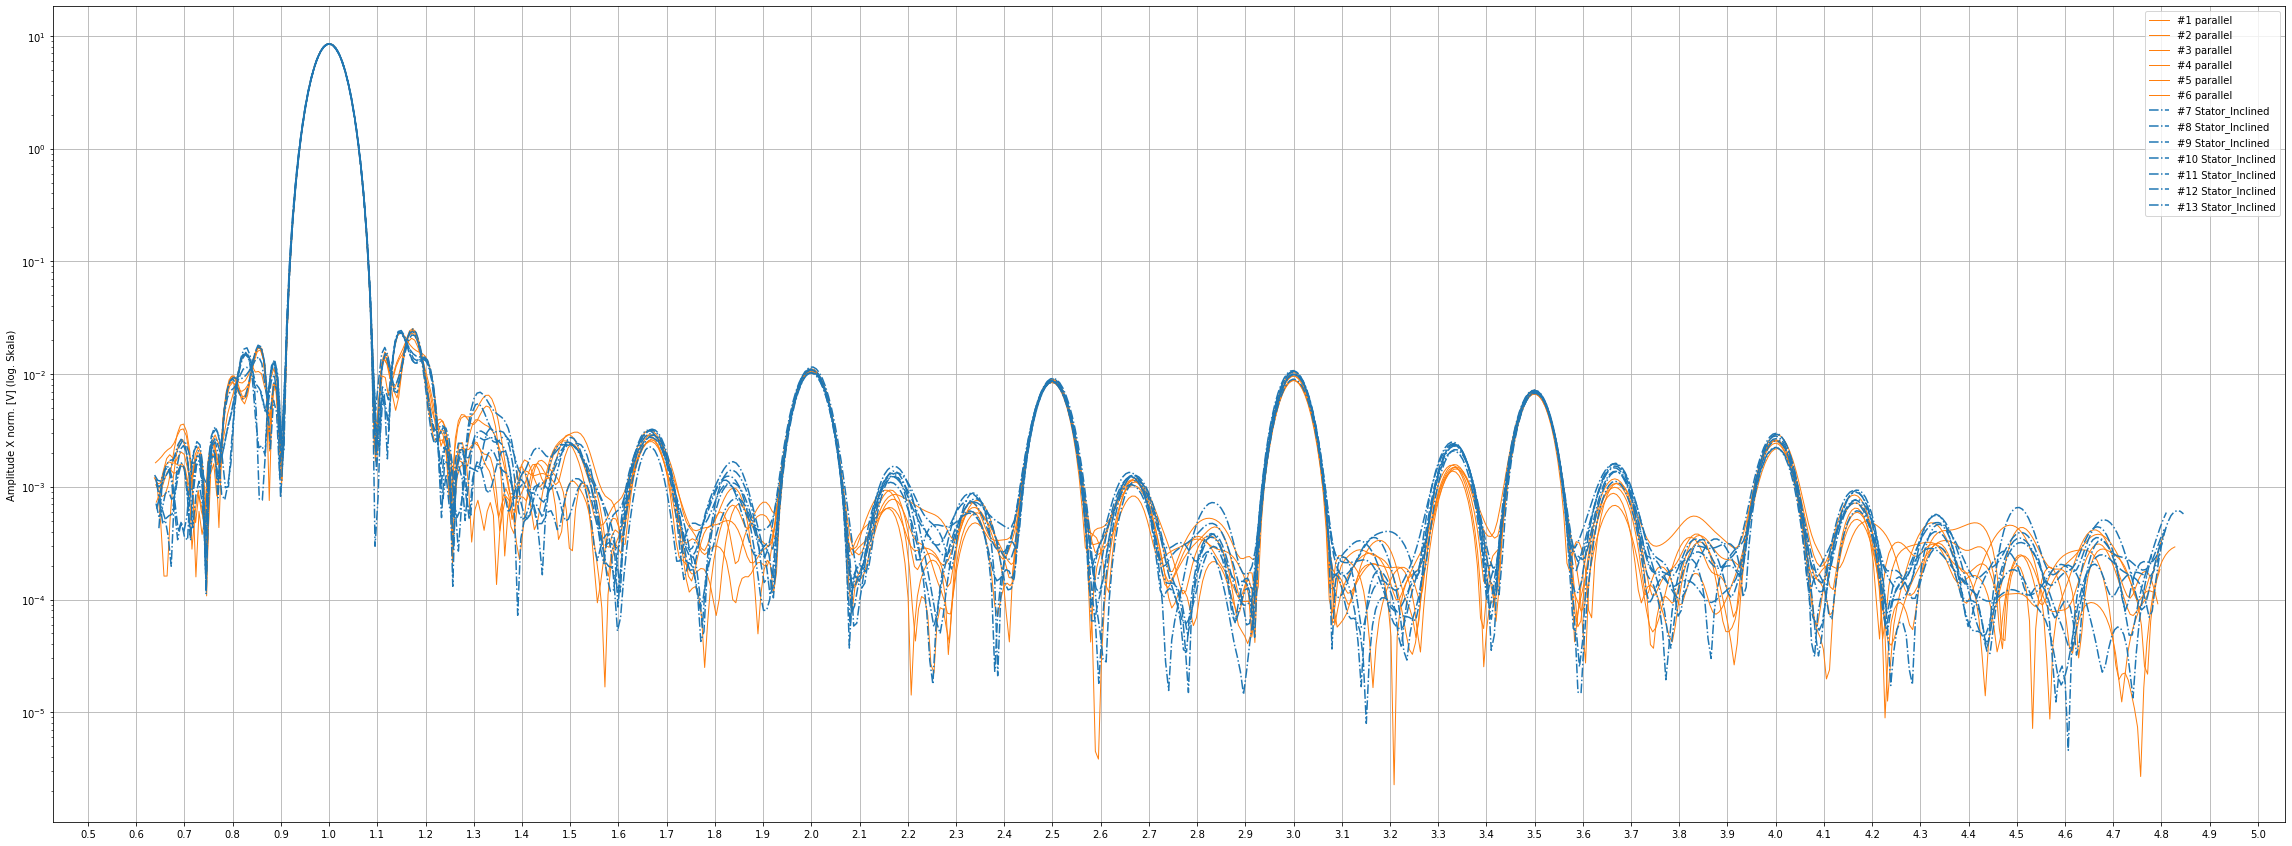

In [20]:
plotfft2(spek,xf=xk_spek,m=20,n=150,dtick=0.1,plot=1,figsize=(2*20,1*15),qual=1*900)

In [21]:
bin_width=0.2
offset=0.1
df_b1=pd.DataFrame()
for index, row in scope_dat.iterrows():
    df_b0=pd.DataFrame()
    df_b0['yf']=spek[index].copy()
    df_b0['xk']=xk_spek[index].copy()
    df_b0['bin']=(df_b0['xk']+offset)//bin_width
    if(index==0):
        df_b1=df_b0.groupby(['bin']).sum()
        df_b1['xk']=df_b1.index*bin_width
    else:
        df_b1['yf']=df_b0.groupby(['bin'])['yf'].sum()
    df_b1.rename(columns = {"yf": index}, inplace=True)
df_b1['freq']=df_b1['xk']
spek_bins_xk=df_b1.copy()

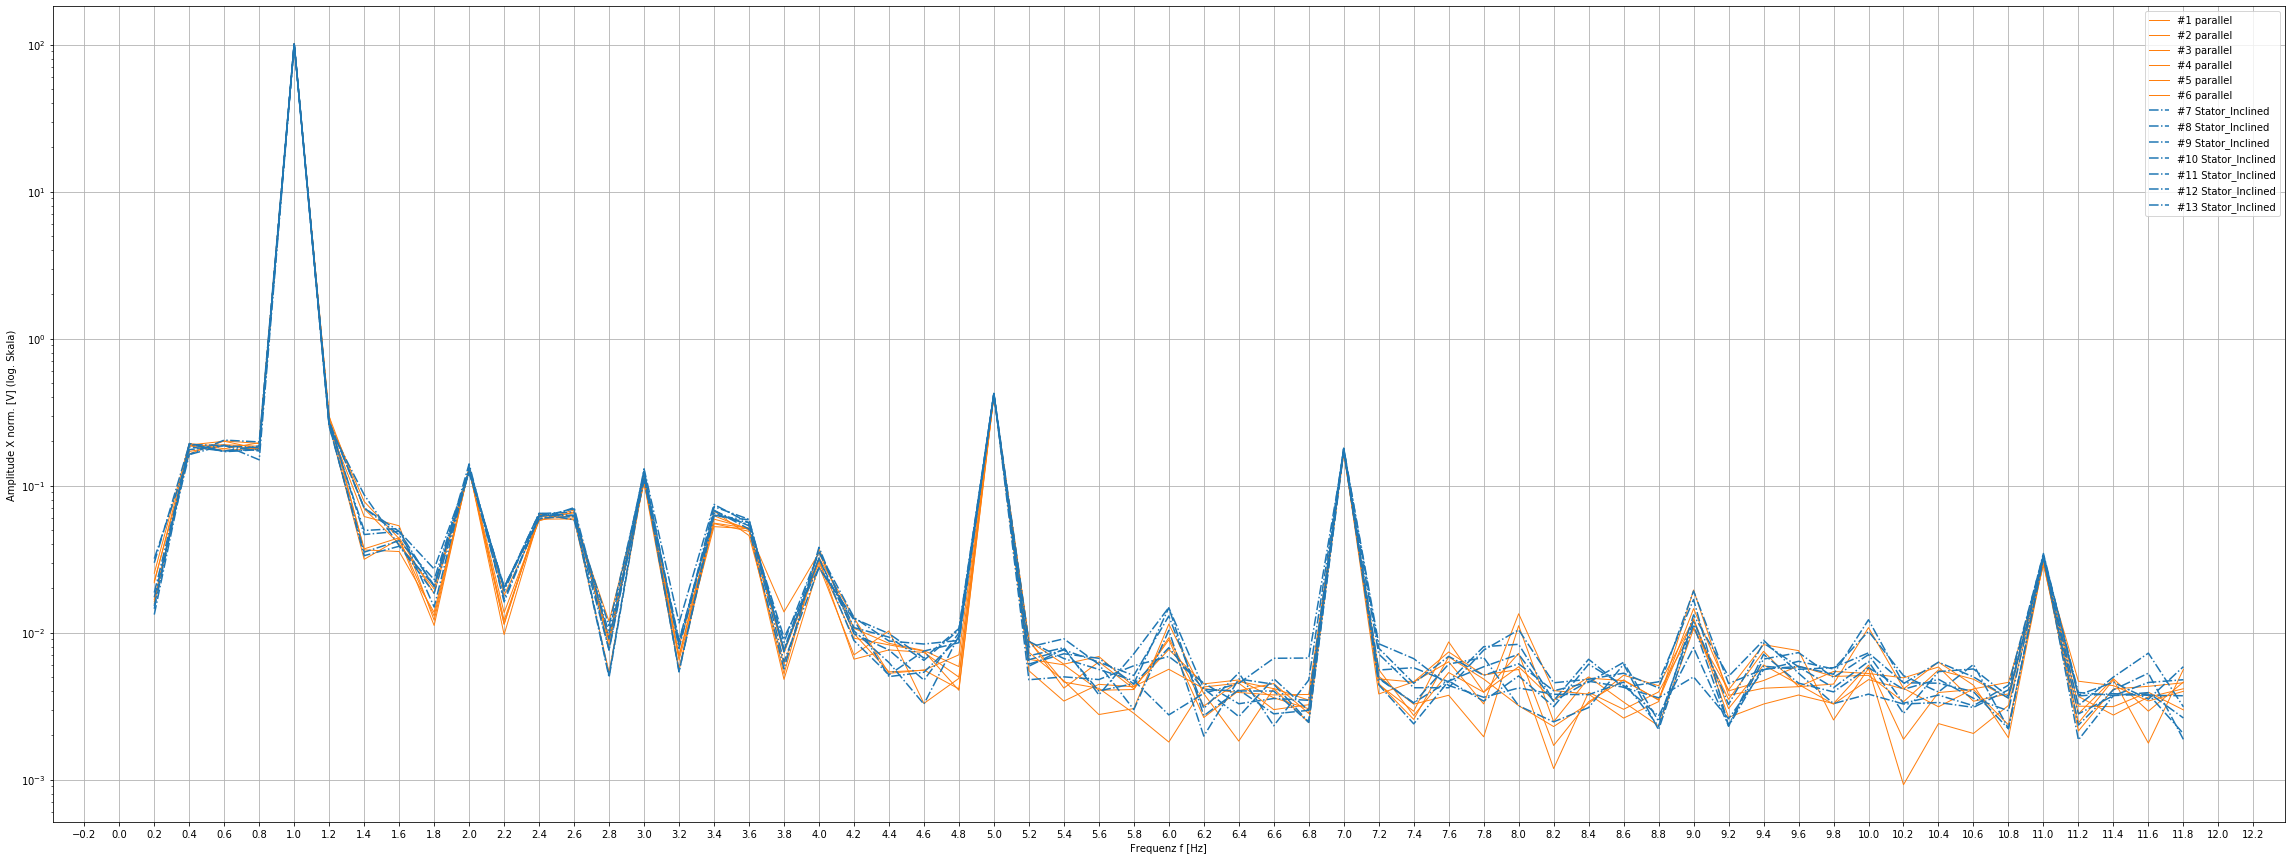

In [22]:
plotfft2(spek_bins_xk,m=0,n=12,dtick=0.2,plot=1,figsize=(2*20,1*15))

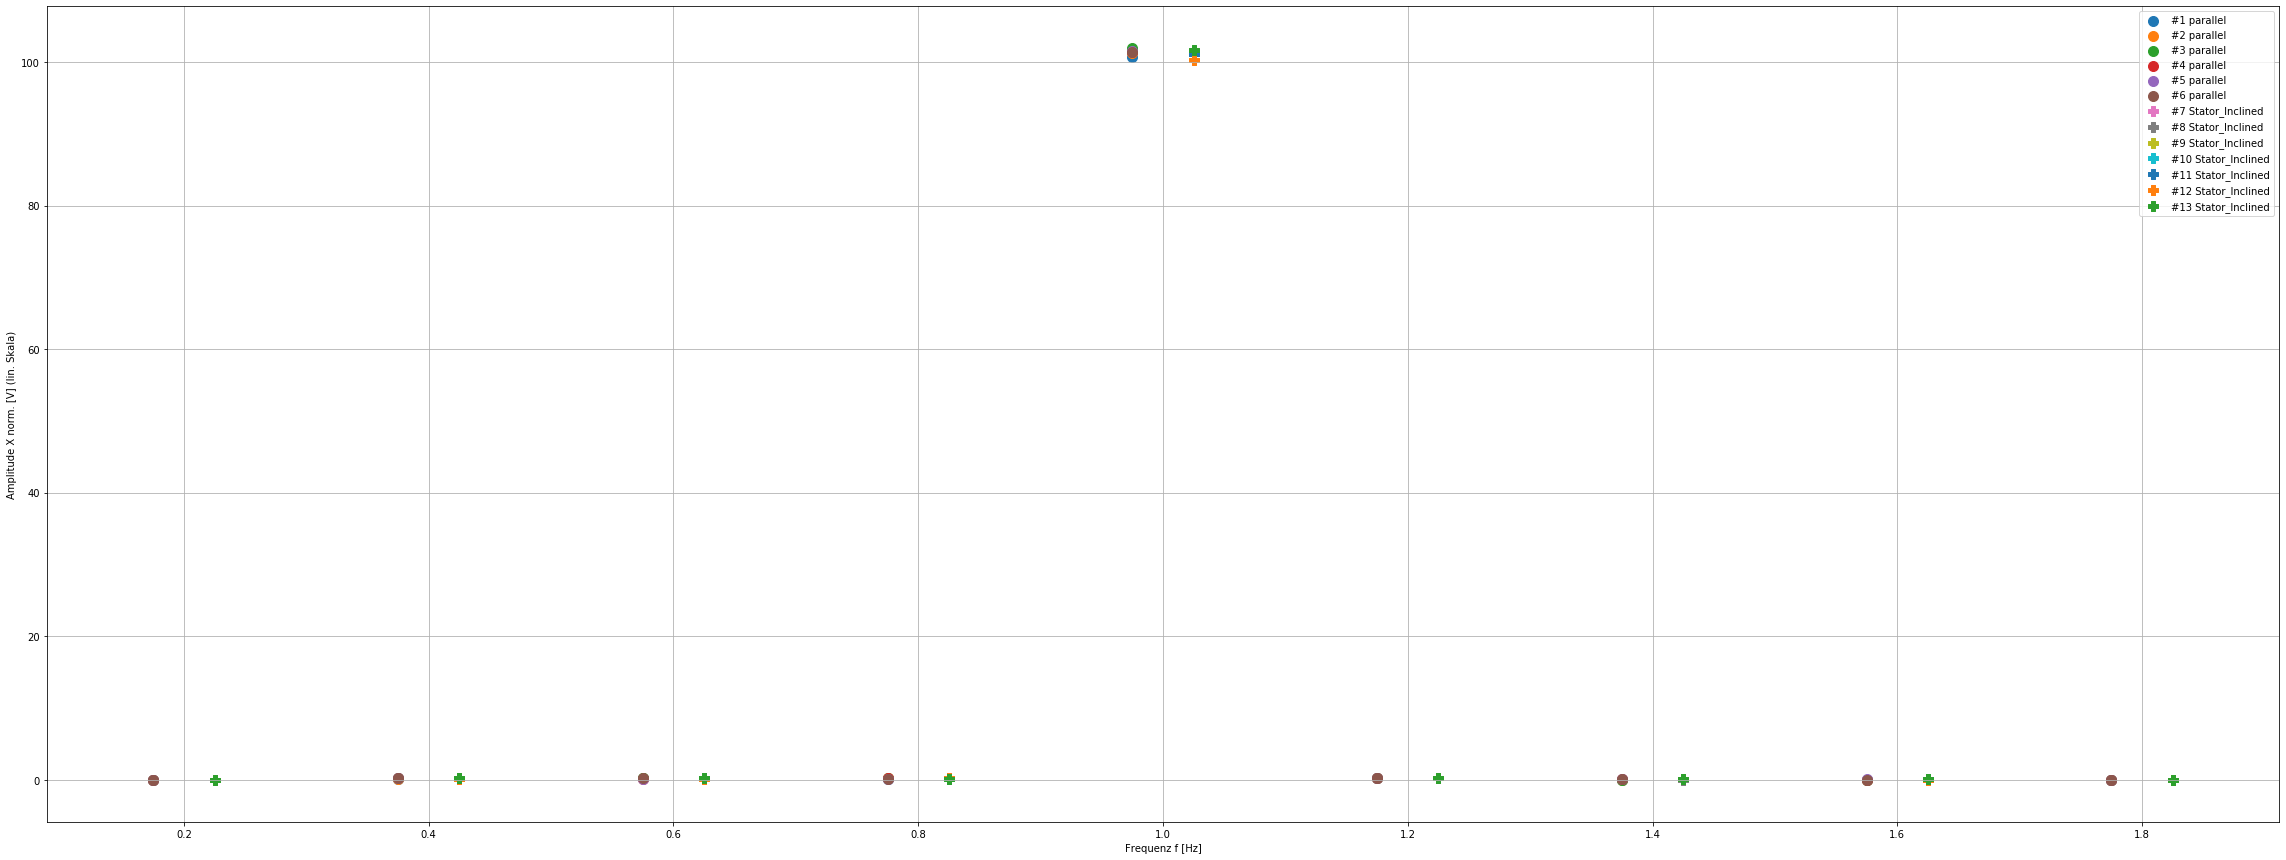

In [23]:
plotfft2(spek_bins_xk,m=0,n=2,dtick=0.2,plot=2,sp=100,figsize=(2*20,1*15))

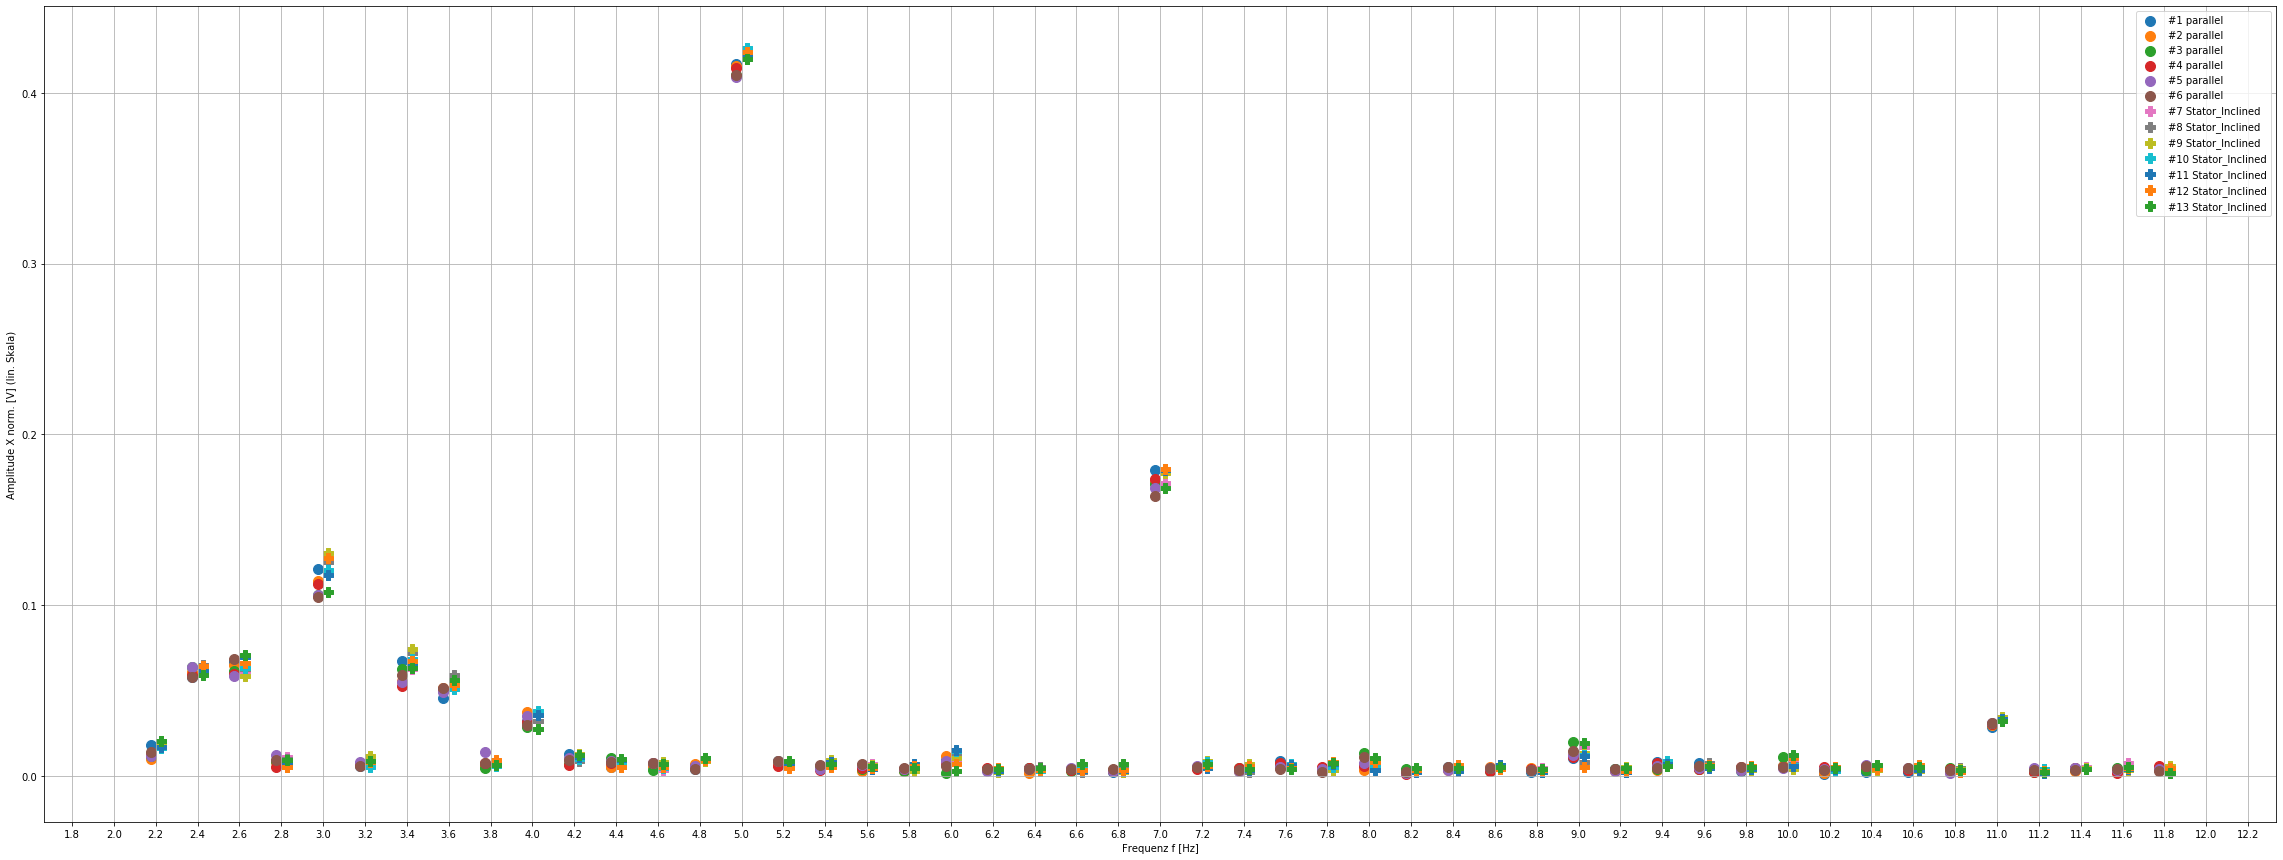

In [24]:
plotfft2(spek_bins_xk,m=2,n=12,dtick=0.2,plot=2,sp=100,figsize=(2*20,1*15))

## Mittelwertberechnung für MA Plot in Rotorauslenkung Notebook 20210727

In [30]:
#Hier stimmt etwas nicht, die Werte sind nicht korrekt!
spek_mean=pd.DataFrame()
scope_dat['index_copy']=scope_dat.index
Symbols=['Stator_Inclined','parallel']
for sym in Symbols:
    col_1=scope_dat.loc[scope_dat['Symbol']==sym,'index_copy'].values
    spek_mean[sym]=spek_bins_xk.loc[:,col_1].mean(axis=1)
#spek_mean.to_pickle('spek_mean_Statorschraeg.pkl')

In [34]:
spek_mean[1:8]

Stator_Inclined    parallel
bin                             
1.0         0.020149    0.019767
2.0         0.180112    0.182028
3.0         0.183089    0.188979
4.0         0.177235    0.184682
5.0       101.116197  101.342627
6.0         0.262452    0.276627
7.0         0.056112    0.052469
8.0         0.045048    0.043392

In [35]:
spek_bins_xk.iloc[1:8]

0   xk           1           2           3           4  \
bin                                                                    
1.0    0.016848  0.2    0.022480    0.016259    0.025378    0.021888   
2.0    0.170864  0.4    0.164582    0.187180    0.194035    0.186416   
3.0    0.188957  0.6    0.201669    0.189985    0.178344    0.174240   
4.0    0.174703  0.8    0.193831    0.185333    0.195969    0.180029   
5.0  100.752710  1.0  101.248358  101.878903  101.319457  101.452540   
6.0    0.259567  1.2    0.297545    0.276687    0.294560    0.254221   
7.0    0.031550  1.4    0.036590    0.037183    0.069745    0.061707   

              5           6           7           8           9          10  \
bin                                                                           
1.0    0.015752    0.014551    0.031906    0.015210    0.018760    0.017412   
2.0    0.189092    0.191061    0.162746    0.193615    0.175925    0.163117   
3.0    0.200676    0.171853    0.188722    0.170253    0.187166    0.204267   
4.0    0.178228    0.176548    0.149947    0.175904    0.181215    0.198421   
5.0  101.403792  101.376756  101.068023  101.180666  101.090422  101.172703   
6.0    0.277183    0.257043    0.252997    0.260691    0.269593    0.270324   
7.0    0.078041    0.033419    0.035313    0.049593    0.070701    0.070520   

             11          12  freq  
bin                                
1.0    0.013284    0.029919   0.2  
2.0    0.183492    0.190828   0.4  
3.0    0.172041    0.187321   0.6  
4.0    0.186517    0.172091   0.8  
5.0  100.257463  101.667348   1.0  
6.0    0.252455    0.274060   1.2  
7.0    0.086704    0.046538   1.4

In [32]:
scope_dat

Unnamed: 0  Index1      Date Description0   Part Description1  \
0          142     143  20210729     Aufnahme  scope           65   
1          143     144  20210729     Aufnahme  scope           66   
2          144     145  20210729     Aufnahme  scope           67   
3          145     146  20210729     Aufnahme  scope           68   
4          146     147  20210729     Aufnahme  scope           69   
5          147     148  20210729     Aufnahme  scope           70   
6          148     149  20210729     Aufnahme  scope           71   
7          149     150  20210729     Aufnahme  scope           72   
8          150     151  20210729     Aufnahme  scope           73   
9          151     152  20210729     Aufnahme  scope           74   
10         152     153  20210729     Aufnahme  scope           75   
11         153     154  20210729     Aufnahme  scope           76   
12         154     155  20210729     Aufnahme  scope           77   

                                           SerialFile  \
0                                                 NaN   
1   ../measurement_data/20210729/ZC/Lines_20210729...   
2   ../measurement_data/20210729/ZC/Lines_20210729...   
3   ../measurement_data/20210729/ZC/Lines_20210729...   
4   ../measurement_data/20210729/ZC/Lines_20210729...   
5   ../measurement_data/20210729/ZC/Lines_20210729...   
6   ../measurement_data/20210729/ZC/Lines_20210729...   
7   ../measurement_data/20210729/ZC/Lines_20210729...   
8   ../measurement_data/20210729/ZC/Lines_20210729...   
9   ../measurement_data/20210729/ZC/Lines_20210729...   
10  ../measurement_data/20210729/ZC/Lines_20210729...   
11  ../measurement_data/20210729/ZC/Lines_20210729...   
12  ../measurement_data/20210729/ZC/Lines_20210729...   

                                            ScopeFile           Symbol  \
0   ../measurement_data/20210729/scope/scope_65_1.csv         parallel   
1   ../measurement_data/20210729/scope/scope_66_1.csv         parallel   
2   ../measurement_data/20210729/scope/scope_67_1.csv         parallel   
3   ../measurement_data/20210729/scope/scope_68_1.csv         parallel   
4   ../measurement_data/20210729/scope/scope_69_1.csv         parallel   
5   ../measurement_data/20210729/scope/scope_70_1.csv         parallel   
6   ../measurement_data/20210729/scope/scope_71_1.csv  Stator_Inclined   
7   ../measurement_data/20210729/scope/scope_72_1.csv  Stator_Inclined   
8   ../measurement_data/20210729/scope/scope_73_1.csv  Stator_Inclined   
9   ../measurement_data/20210729/scope/scope_74_1.csv  Stator_Inclined   
10  ../measurement_data/20210729/scope/scope_75_1.csv  Stator_Inclined   
11  ../measurement_data/20210729/scope/scope_76_1.csv  Stator_Inclined   
12  ../measurement_data/20210729/scope/scope_77_1.csv  Stator_Inclined   

   CalcByPy 2Tex  Value Unit          Unnamed: 13    fr_mean  index_copy  
0       NaN  NaN    NaN  NaN                  NaN  31.028671           0  
1       NaN  NaN   31.2   Hz                  NaN  31.171528           1  
2       NaN  NaN   31.3   Hz                  NaN  31.371529           2  
3       NaN  NaN   31.2   Hz                  NaN  31.228671           3  
4       NaN  NaN   31.3   Hz                  NaN  31.285814           4  
5       NaN  NaN   31.2   Hz                  NaN  31.257243           5  
6       NaN  NaN   31.2   Hz                  NaN  31.228671           6  
7       NaN  NaN    NaN   Hz                  NaN  31.142957           7  
8       NaN  NaN   31.2   Hz                  NaN  31.200100           8  
9       NaN  NaN   31.2   Hz  abnehmnede Drehzahl  31.142957           9  
10      NaN  NaN   31.2   Hz                  NaN  31.171528          10  
11      NaN  NaN   31.0   Hz              n const  30.914385          11  
12      NaN  NaN   31.3   Hz              n const  31.342957          12